In [1]:
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
train= pd.read_csv('dataset/train_data.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [3]:
train.shape

(318438, 18)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [6]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [7]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [8]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [9]:
train.drop(['case_id', 'patientid', 'Stay', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient'], axis=1, inplace=True)

In [10]:
cat_cols=[]
num_cols=[]
for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)
for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)
print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']
['Hospital_code', 'City_Code_Hospital', 'Visitors with Patient', 'Admission_Deposit']


In [11]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8,c,3,Z,radiotherapy,R,F,Emergency,Extreme,2,51-60,4911.0
1,2,c,5,Z,radiotherapy,S,F,Trauma,Extreme,2,51-60,5954.0
2,10,e,1,X,anesthesia,S,E,Trauma,Extreme,2,51-60,4745.0
3,26,b,2,Y,radiotherapy,R,D,Trauma,Extreme,2,51-60,7272.0
4,26,b,2,Y,radiotherapy,S,D,Trauma,Extreme,2,51-60,5558.0


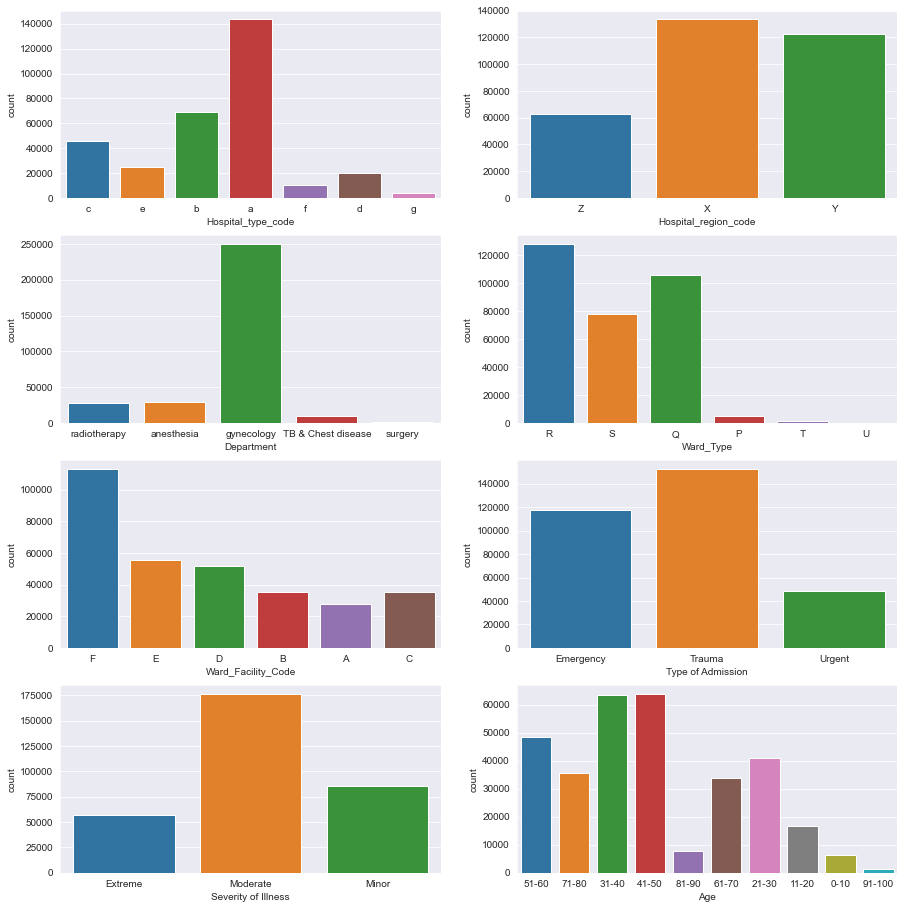

In [12]:
i=1
plt.figure(figsize=(15,20))
for col in cat_cols:
    plt.subplot(5,2,i)
    sns.countplot(train[col])
    i=i+1
plt.show()

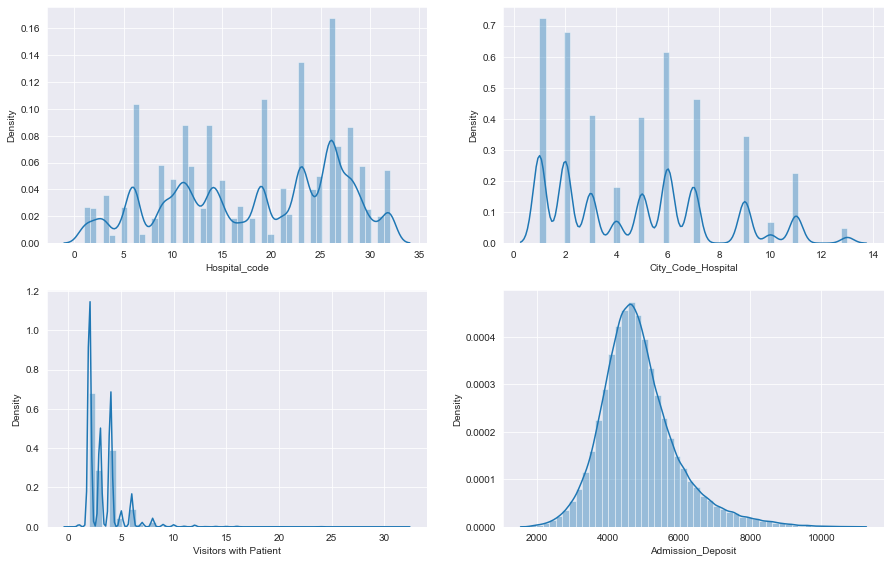

In [13]:
i=1
plt.figure(figsize=(15,20))
for col in num_cols:
    plt.subplot(4,2,i)
    sns.distplot(train[col])
    i=i+1
plt.show()

In [14]:
train['Ward_Type']

0         R
1         S
2         S
3         R
4         S
         ..
318433    Q
318434    Q
318435    R
318436    Q
318437    Q
Name: Ward_Type, Length: 318438, dtype: object

In [15]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [16]:
cat_cols.remove('Ward_Type')

In [17]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat_cols.append('City_Code_Hospital')
for col in cat_cols:
    train[col]= le.fit_transform(train[col])

In [19]:
from joblib import dump
dump(le, 'le_encoder.bin')

['le_encoder.bin']

In [20]:
train[cat_cols]

,Hospital_type_code,Hospital_region_code,Department,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,City_Code_Hospital
0,2,2,3,5,0,0,5,2
1,2,2,3,5,1,0,5,4
2,4,0,1,4,1,0,5,0
3,1,1,3,3,1,0,5,1
4,1,1,3,3,1,0,5,1
...,...,...,...,...,...,...,...,...
318433,0,0,3,5,0,2,4,5
318434,0,0,1,4,2,2,8,0
318435,0,0,2,5,0,1,7,3
318436,1,1,1,3,1,1,1,1


In [21]:
train['City_Code_Hospital'].value_counts()

0     55351
1     51809
5     46991
6     35463
2     31569
4     31105
7     26277
9     17137
3     13857
8      5249
10     3630
Name: City_Code_Hospital, dtype: int64

In [22]:
num_cols

['Hospital_code',
 'City_Code_Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

In [23]:
num_cols.remove('City_Code_Hospital')
# num_cols.remove('Bed Grade')
num_cols

['Hospital_code', 'Visitors with Patient', 'Admission_Deposit']

<AxesSubplot:>

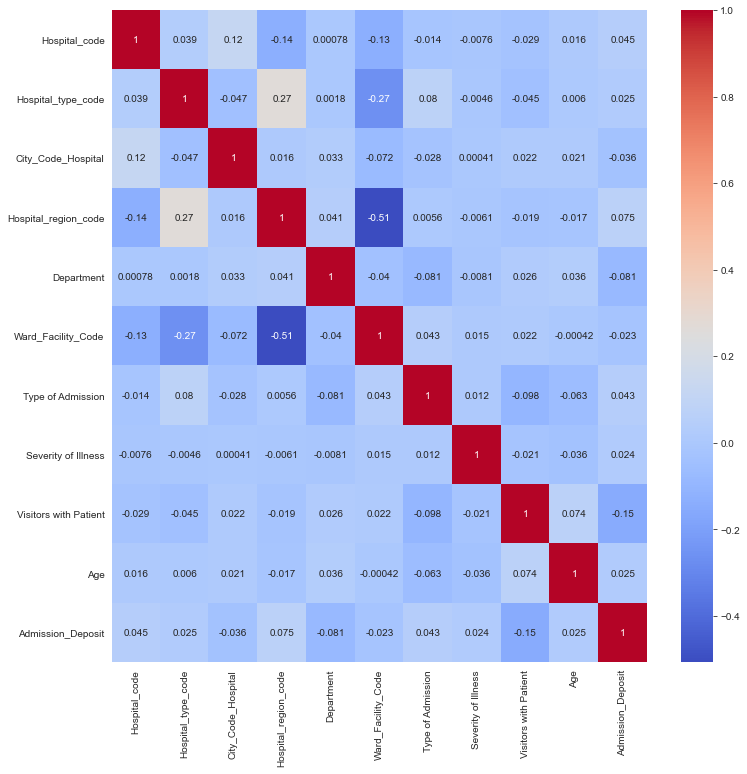

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [25]:
print(train.shape)
train.head()

(318438, 12)


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8,2,2,2,3,R,5,0,0,2,5,4911.0
1,2,2,4,2,3,S,5,1,0,2,5,5954.0
2,10,4,0,0,1,S,4,1,0,2,5,4745.0
3,26,1,1,1,3,R,3,1,0,2,5,7272.0
4,26,1,1,1,3,S,3,1,0,2,5,5558.0


In [26]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
train[num_cols]= ss.fit_transform(train[num_cols].values)

In [27]:
dump(ss, 'std_scaler.bin')

['std_scaler.bin']

In [28]:
train[num_cols].head(5)

,Hospital_code,Visitors with Patient,Admission_Deposit
0,-1.195176,-0.727923,0.027835
1,-1.890124,-0.727923,0.987556
2,-0.963527,-0.727923,-0.124910
3,0.889668,-0.727923,2.200319
4,0.889668,-0.727923,0.623175


In [29]:
from sklearn.model_selection import train_test_split
y= train[['Ward_Type']]
X= train.drop(['Ward_Type'], axis=1)

In [30]:
X.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,-1.195176,2,2,2,3,5,0,0,-0.727923,5,0.027835
1,-1.890124,2,4,2,3,5,1,0,-0.727923,5,0.987556
2,-0.963527,4,0,0,1,4,1,0,-0.727923,5,-0.124910
3,0.889668,1,1,1,3,3,1,0,-0.727923,5,2.200319
4,0.889668,1,1,1,3,3,1,0,-0.727923,5,0.623175


In [31]:
y.head()

,Ward_Type
0,R
1,S
2,S
3,R
4,S


In [32]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

In [33]:
print(f'The shape of X_Train - {X_train.shape}')
print(f'The shape of X_test - {X_test.shape}')
print(f'The shape of y_train - {y_train.shape}')
print(f'The shape of y_test - {y_test.shape}')

The shape of X_Train - (254750, 11)
The shape of X_test - (63688, 11)
The shape of y_train - (254750, 1)
The shape of y_test - (63688, 1)


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
xgb = XGBClassifier(n_estimators=50)
xgb.fit(X_train, y_train)

[11:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# Saving the model
dump(xgb, 'classsifier.bin')

['classsifier.bin']

In [37]:
y_pred= xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6602656701419419
[[   88   352   470    99     0     0]
 [   82 13648  5817  1678     8     0]
 [   36  3510 19994  2038    12     0]
 [   38  3764  3438  8319     0     0]
 [    0    67   207    19     2     0]
 [    0     0     2     0     0     0]]
              precision    recall  f1-score   support

           P       0.36      0.09      0.14      1009
           Q       0.64      0.64      0.64     21233
           R       0.67      0.78      0.72     25590
           S       0.68      0.53      0.60     15559
           T       0.09      0.01      0.01       295
           U       0.00      0.00      0.00         2

    accuracy                           0.66     63688
   macro avg       0.41      0.34      0.35     63688
weighted avg       0.66      0.66      0.65     63688



In [38]:
test= pd.read_csv('dataset/test_data.csv')
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [39]:
test.shape

(137057, 17)

In [40]:
test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [41]:
test['City_Code_Patient'].fillna(statistics.mode(test['City_Code_Patient']),inplace=True)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1370

In [43]:
test.drop(['case_id', 
           'patientid', 
           'Available Extra Rooms in Hospital', 
           'Bed Grade', 
           'City_Code_Patient', 
           'Ward_Type'], axis=1, inplace=True
         )

In [44]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'City_Code_Hospital']

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Hospital_code          137057 non-null  int64  
 1   Hospital_type_code     137057 non-null  object 
 2   City_Code_Hospital     137057 non-null  int64  
 3   Hospital_region_code   137057 non-null  object 
 4   Department             137057 non-null  object 
 5   Ward_Facility_Code     137057 non-null  object 
 6   Type of Admission      137057 non-null  object 
 7   Severity of Illness    137057 non-null  object 
 8   Visitors with Patient  137057 non-null  int64  
 9   Age                    137057 non-null  object 
 10  Admission_Deposit      137057 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 11.5+ MB


In [46]:
print(cat_cols)
for col in cat_cols:
    test[col]= le.fit_transform(test[col])

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'City_Code_Hospital']


In [47]:
test[num_cols]= ss.transform(test[num_cols].values)

In [48]:
test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.310544,2,2,2,2,0,0,2,-0.727923,7,-1.643165
1,1.237141,0,3,0,2,5,1,2,0.405826,7,-0.793862
2,0.889668,1,1,1,2,3,0,2,-0.161049,7,-0.357709
3,-1.426825,0,5,0,2,5,1,2,-0.161049,7,-0.651238
4,1.121317,1,9,0,2,5,1,2,0.405826,7,-0.662280
...,...,...,...,...,...,...,...,...,...,...,...
137052,-0.847702,1,1,1,1,3,0,1,0.405826,4,1.317891
137053,0.773843,4,0,0,3,4,0,2,-0.727923,0,-1.261301
137054,1.352966,2,2,2,1,0,2,1,-0.727923,0,2.124866
137055,-1.542650,0,0,0,1,4,1,1,-0.727923,4,0.509996


In [49]:
predictions= xgb.predict(test)

In [50]:
np. set_printoptions(threshold=np. inf)
print(predictions)

['S' 'S' 'R' 'R' 'R' 'R' 'R' 'S' 'Q' 'Q' 'Q' 'R' 'R' 'R' 'Q' 'Q' 'S' 'R'
 'Q' 'S' 'S' 'R' 'Q' 'Q' 'R' 'R' 'Q' 'P' 'R' 'R' 'Q' 'R' 'R' 'Q' 'R' 'Q'
 'Q' 'R' 'R' 'Q' 'R' 'R' 'S' 'S' 'Q' 'R' 'R' 'R' 'R' 'R' 'S' 'S' 'R' 'R'
 'R' 'S' 'R' 'R' 'R' 'S' 'Q' 'R' 'R' 'S' 'S' 'Q' 'Q' 'R' 'S' 'R' 'S' 'R'
 'R' 'R' 'S' 'Q' 'S' 'R' 'S' 'R' 'R' 'Q' 'S' 'R' 'S' 'Q' 'R' 'Q' 'R' 'R'
 'Q' 'Q' 'Q' 'S' 'Q' 'R' 'Q' 'Q' 'Q' 'R' 'R' 'Q' 'S' 'S' 'S' 'Q' 'R' 'S'
 'R' 'Q' 'R' 'S' 'S' 'R' 'R' 'Q' 'S' 'R' 'R' 'R' 'R' 'S' 'Q' 'Q' 'Q' 'R'
 'R' 'S' 'R' 'S' 'R' 'S' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'S'
 'R' 'R' 'R' 'R' 'R' 'R' 'Q' 'R' 'R' 'R' 'S' 'Q' 'Q' 'Q' 'Q' 'S' 'R' 'R'
 'R' 'R' 'S' 'R' 'Q' 'R' 'Q' 'R' 'R' 'R' 'Q' 'R' 'Q' 'R' 'S' 'R' 'R' 'S'
 'R' 'S' 'S' 'Q' 'R' 'R' 'S' 'Q' 'S' 'Q' 'S' 'R' 'Q' 'R' 'R' 'T' 'Q' 'Q'
 'R' 'Q' 'Q' 'R' 'R' 'R' 'S' 'R' 'S' 'Q' 'R' 'Q' 'R' 'S' 'R' 'S' 'R' 'R'
 'R' 'R' 'R' 'Q' 'Q' 'Q' 'R' 'S' 'Q' 'R' 'S' 'S' 'S' 'S' 'R' 'S' 'Q' 'R'
 'S' 'R' 'Q' 'S' 'R' 'S' 'R' 'Q' 'R' 'S' 'S' 'S' 'R

<AxesSubplot:ylabel='count'>

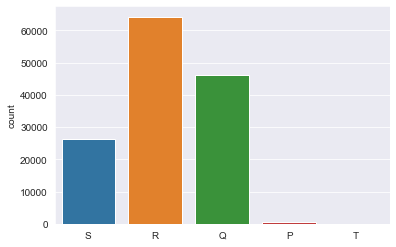

In [51]:
sns.countplot(predictions)

In [52]:
# # Saving the model
# import pickle
# # Saving our classifier
# with open('classifier.pickle','wb') as f:
#     pickle.dump(xgb,f)

In [56]:
# Training Samples
temp = pd.read_csv('dataset/test_data.csv')
temp.head().T

,0,1,2,3,4
case_id,318439,318440,318441,318442,318443
Hospital_code,21,29,26,6,28
Hospital_type_code,c,a,b,a,b
City_Code_Hospital,3,4,2,6,11
Hospital_region_code,Z,X,Y,X,X
Available Extra Rooms in Hospital,3,2,3,3,2
Department,gynecology,gynecology,gynecology,gynecology,gynecology
Ward_Type,S,S,Q,Q,R
Ward_Facility_Code,A,F,D,F,F
Bed Grade,2.0,2.0,4.0,2.0,2.0


In [54]:
temp.dtypes